In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

2024-05-05 00:53:41.326705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.8579 - loss: 0.4563
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9835 - loss: 0.0562
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9875 - loss: 0.0391
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9902 - loss: 0.0310
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9930 - loss: 0.0210


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0401
Test accuracy: 0.9897000193595886


In [8]:
import numpy as np

index = 1
test_image = test_images[index]

test_image = np.reshape(test_image, (1, 28, 28, 1 )) # batch(cuz trained on 32 batch SGD), x, y, rbg(can ignore)

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted label: 2


In [9]:
test_labels[1]

2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


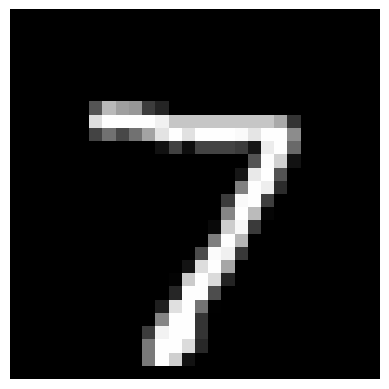

Predicted label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


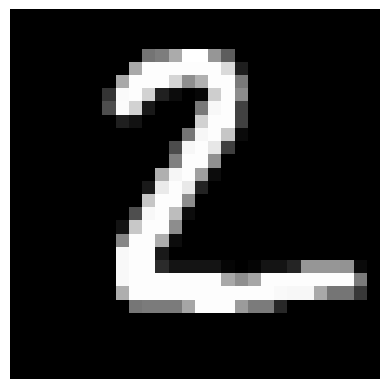

Predicted label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


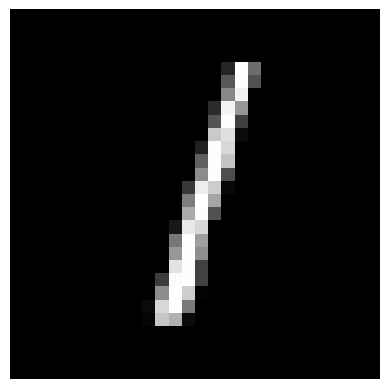

Predicted label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


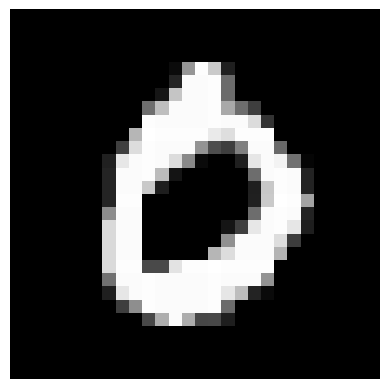

Predicted label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


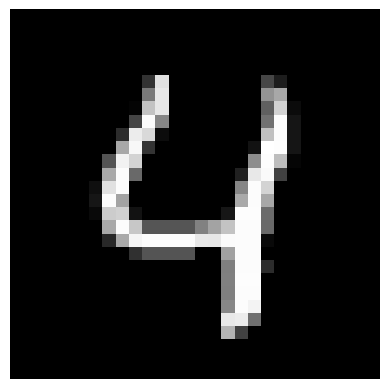

Predicted label: 4


In [10]:
import numpy as np
import time



indices = [0, 1, 2, 3, 4]

for index in indices:
    test_image = test_images[index]

    test_image_reshaped = np.reshape(test_image, (1, 28, 28, 1))

    prediction = model.predict(test_image_reshaped)

    predicted_label = np.argmax(prediction)

    plt.imshow(test_image, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Predicted label:", predicted_label)

